In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

In [2]:
verybad = pd.read_csv('Aggressive_Driving.csv')

In [ ]:
verybad.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.842663e+06,5.412968e+06,3514248,939781,2006,2006/04/28 04:00:00+00,2349,23,BLOOR ST W,DUFFERIN ST,<Null>,Major Arterial,Toronto and East York,9,14,43.659945,-79.43499,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Non-Fatal Injury,Cyclist Collisions,Driver,50 to 54,None,<Null>,West,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D14,83,Dufferin Grove (83),1
1,-8.842663e+06,5.412968e+06,3514249,939781,2006,2006/04/28 04:00:00+00,2349,23,BLOOR ST W,DUFFERIN ST,<Null>,Major Arterial,Toronto and East York,9,14,43.659945,-79.43499,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Non-Fatal Injury,Cyclist Collisions,Driver,unknown,None,<Null>,East,"Automobile, Station Wagon",Going Ahead,Speed too Fast For Condition,Normal,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D14,83,Dufferin Grove (83),2
2,-8.842663e+06,5.412968e+06,3514250,939781,2006,2006/04/28 04:00:00+00,2349,23,BLOOR ST W,DUFFERIN ST,<Null>,Major Arterial,Toronto and East York,9,14,43.659945,-79.43499,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Non-Fatal Injury,Cyclist Collisions,Vehicle Owner,unknown,<Null>,<Null>,<Null>,Other,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D14,83,Dufferin Grove (83),3
3,-8.842663e+06,5.412968e+06,3514251,939781,2006,2006/04/28 04:00:00+00,2349,23,BLOOR ST W,DUFFERIN ST,<Null>,Major Arterial,Toronto and East York,9,14,43.659945,-79.43499,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Non-Fatal Injury,Cyclist Collisions,Vehicle Owner,unknown,<Null>,<Null>,<Null>,Other,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D14,83,Dufferin Grove (83),4
4,-8.842663e+06,5.412968e+06,3514252,939781,2006,2006/04/28 04:00:00+00,2349,23,BLOOR ST W,DUFFERIN ST,<Null>,Major Arterial,Toronto and East York,9,14,43.659945,-79.43499,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Non-Fatal Injury,Cyclist Collisions,Driver,35 to 39,Minor,<Null>,East,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D14,83,Dufferin Grove (83),5


In [49]:
verybad['MONTH'] = pd.DatetimeIndex(verybad['DATE']).month
verybad['DAY'] = pd.DatetimeIndex(verybad['DATE']).day

In [4]:
verybad.shape

(8703, 59)

In [5]:
verybad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                8703 non-null   float64
 1   Y                8703 non-null   float64
 2   INDEX_           8703 non-null   int64  
 3   ACCNUM           8703 non-null   int64  
 4   YEAR             8703 non-null   int64  
 5   DATE             8703 non-null   object 
 6   TIME             8703 non-null   int64  
 7   HOUR             8703 non-null   int64  
 8   STREET1          8703 non-null   object 
 9   STREET2          8703 non-null   object 
 10  OFFSET           8703 non-null   object 
 11  ROAD_CLASS       8703 non-null   object 
 12  DISTRICT         8703 non-null   object 
 13  WARDNUM          8703 non-null   object 
 14  DIVISION         8703 non-null   object 
 15  LATITUDE         8703 non-null   float64
 16  LONGITUDE        8703 non-null   float64
 17  LOCCOORD      

In [70]:
verybad['ACCNUM'].nunique()

2910

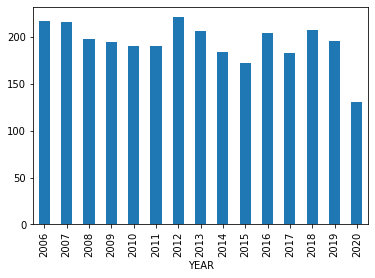

In [ ]:
# Accidents caused by aggressive driving per year
verybad.groupby('YEAR')['ACCNUM'].nunique().plot(kind='bar')

In [19]:
# Number of accidents per year
by_year = verybad.groupby(['YEAR'])['ACCNUM'].nunique()
by_year

YEAR
2006    217
2007    216
2008    198
2009    195
2010    190
2011    190
2012    221
2013    206
2014    184
2015    172
2016    204
2017    183
2018    207
2019    196
2020    131
Name: ACCNUM, dtype: int64

In [ ]:
# Number of fatal accidents per year
verybad[verybad['ACCLASS'] == 'Fatal'].groupby(['YEAR'])['ACCNUM'].count()

YEAR
2006     91
2007     72
2008     90
2009     45
2010     79
2011     69
2012     48
2013    128
2014     60
2015     78
2016     99
2017     68
2018     73
2019     64
2020     35
Name: ACCNUM, dtype: int64

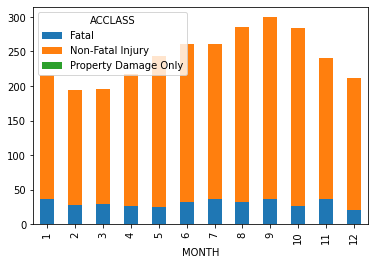

In [ ]:
#Month with most agressive driving
verybad.groupby(['MONTH','ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked=True)

In [ ]:
# Number of accidents per month from 2006-2020 combined
verybad.groupby(['MONTH'])['ACCNUM'].count()

MONTH
1     663
2     600
3     598
4     687
5     751
6     780
7     784
8     892
9     847
10    823
11    673
12    605
Name: ACCNUM, dtype: int64

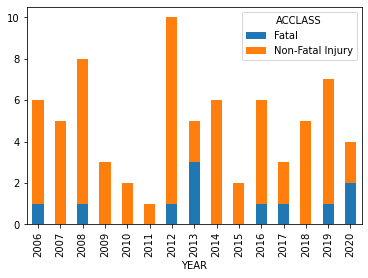

In [ ]:
#First Week of School
verybad[(verybad['MONTH'] == 9) & (verybad['DAY'] >= 3) & (verybad['DAY'] <= 10)].groupby(['YEAR', 'ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked = True)

In [6]:
verybad[(verybad['MONTH'] == 9) & (verybad['DAY'] >= 3) & (verybad['DAY'] <= 10)].groupby(['YEAR', 'ACCLASS'])['ACCNUM'].count()

YEAR  ACCLASS         
2006  Fatal                5
      Non-Fatal Injury    18
2007  Non-Fatal Injury    13
2008  Fatal                2
      Non-Fatal Injury    19
2009  Non-Fatal Injury     8
2010  Non-Fatal Injury     7
2011  Non-Fatal Injury     4
2012  Fatal                3
      Non-Fatal Injury    23
2013  Fatal                7
      Non-Fatal Injury     6
2014  Non-Fatal Injury    15
2015  Non-Fatal Injury     6
2016  Fatal                4
      Non-Fatal Injury    17
2017  Fatal                2
      Non-Fatal Injury     5
2018  Non-Fatal Injury    12
2019  Fatal                2
      Non-Fatal Injury    17
2020  Fatal                5
      Non-Fatal Injury     4
Name: ACCNUM, dtype: int64

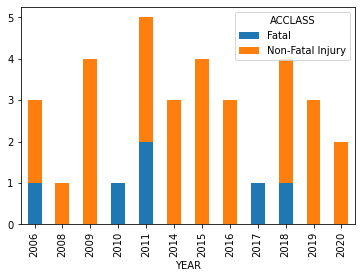

In [36]:
#Christmas Rush Accidents by Year for Aggressive Driving
verybad[(verybad['MONTH'] == 12) & (verybad['DAY'] >= 21) & (verybad['DAY'] <= 25)].groupby(['YEAR', 'ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked = True)

In [7]:
verybad[(verybad['MONTH'] == 12) & (verybad['DAY'] >= 21) & (verybad['DAY'] <= 25)].groupby(['YEAR', 'ACCLASS'])['ACCNUM'].count()

YEAR  ACCLASS         
2006  Fatal                3
      Non-Fatal Injury     7
2008  Non-Fatal Injury     2
2009  Non-Fatal Injury    13
2010  Fatal                5
2011  Fatal                6
      Non-Fatal Injury     7
2014  Non-Fatal Injury     6
2015  Non-Fatal Injury     8
2016  Non-Fatal Injury    10
2017  Fatal                2
2018  Fatal                3
      Non-Fatal Injury    15
2019  Non-Fatal Injury     7
2020  Non-Fatal Injury     4
Name: ACCNUM, dtype: int64

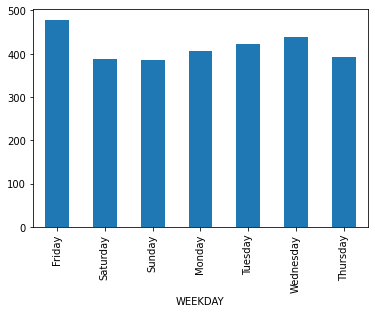

In [62]:
# Aggressive Driving by day of the week
verybad['DATE'] =  pd.to_datetime(verybad['DATE'])
verybad['WEEKDAY'] = verybad['DATE'].dt.day_name()
verybad.groupby('WEEKDAY', sort=False)['ACCNUM'].nunique().plot(kind='bar')

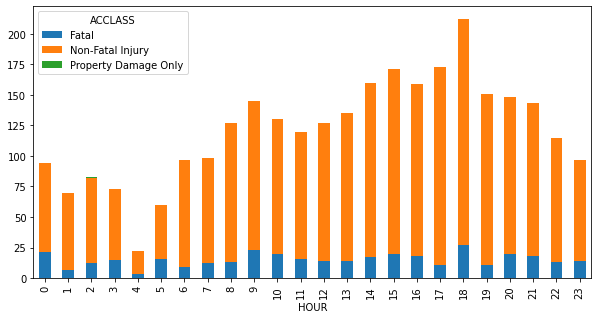

In [ ]:
# Accidents by time of day
verybad.groupby(['HOUR','ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked=True,figsize=(10, 5))

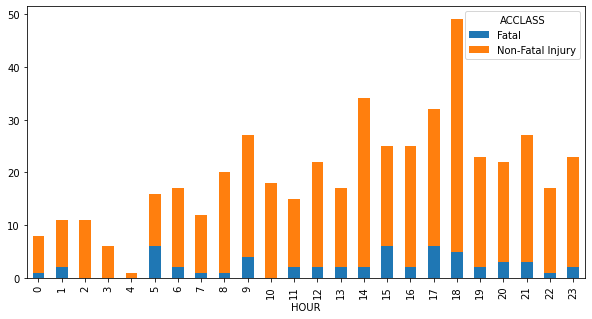

In [69]:
# Accident times on Friday
verybad[(verybad['WEEKDAY']=='Friday')].groupby(['HOUR','ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked=True,figsize=(10, 5))

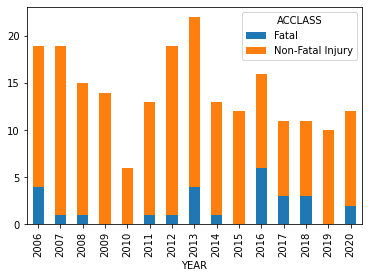

In [ ]:
# Accidents at 6 p.m. per year
verybad[verybad['HOUR'] == 18].groupby(['YEAR','ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked=True)

In [8]:
verybad[verybad['HOUR'] == 18].groupby(['YEAR','ACCLASS'])['ACCNUM'].count()

YEAR  ACCLASS         
2006  Fatal               15
      Non-Fatal Injury    45
2007  Fatal                2
      Non-Fatal Injury    62
2008  Fatal                4
      Non-Fatal Injury    44
2009  Non-Fatal Injury    41
2010  Non-Fatal Injury    15
2011  Fatal                2
      Non-Fatal Injury    38
2012  Fatal                2
      Non-Fatal Injury    54
2013  Fatal               17
      Non-Fatal Injury    41
2014  Fatal                2
      Non-Fatal Injury    25
2015  Non-Fatal Injury    33
2016  Fatal               14
      Non-Fatal Injury    24
2017  Fatal                6
      Non-Fatal Injury    29
2018  Fatal                7
      Non-Fatal Injury    26
2019  Non-Fatal Injury    19
2020  Fatal                5
      Non-Fatal Injury    26
Name: ACCNUM, dtype: int64

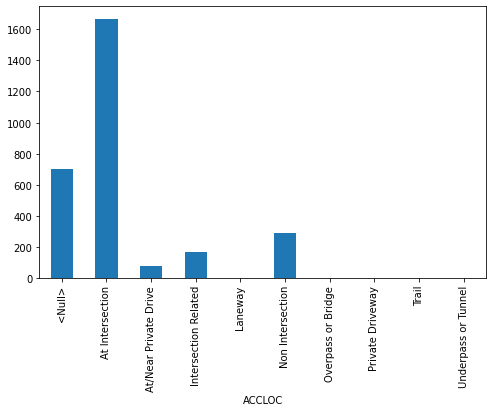

In [ ]:
# Agressive driving by location
verybad.groupby('ACCLOC')['ACCNUM'].nunique().plot(kind='bar',figsize=(8, 5))

In [ ]:
verybad[verybad['ALCOHOL'] == 'Yes'].ACCNUM.count()

498

In [ ]:
verybad[verybad['SPEEDING'] == 'Yes'].ACCNUM.count()

2285

In [ ]:
verybad[(verybad['ALCOHOL']== 'Yes') & (verybad['SPEEDING']== 'Yes')].ACCNUM.count()

313

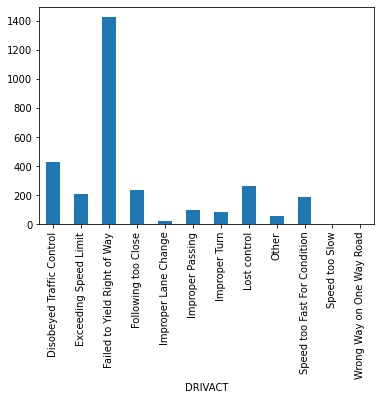

In [ ]:
# Aggressive Driving Actions
verybad[(verybad['DRIVACT'] != '<Null>') & (verybad['DRIVACT'] != 'Driving Properly')].groupby('DRIVACT')['ACCNUM'].nunique().plot(kind='bar')

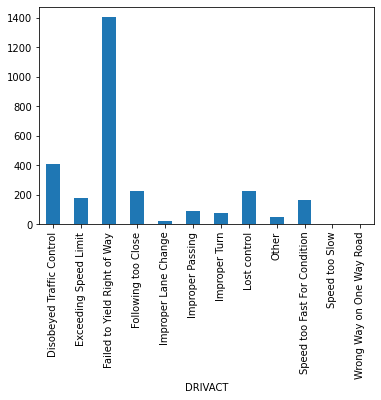

In [ ]:
# Unimpared Aggressive Driving Actions
verybad[(verybad['ALCOHOL'] == '<Null>') & 
        (verybad['DRIVACT'] != '<Null>') &
        (verybad['DRIVACT'] != 'Driving Properly')].groupby('DRIVACT')['ACCNUM'].nunique().plot(kind='bar')

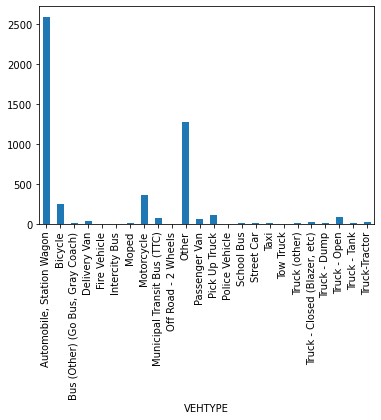

In [ ]:
verybad[(verybad['VEHTYPE'] != '<Null>')].groupby('VEHTYPE')['ACCNUM'].nunique().plot(kind='bar')

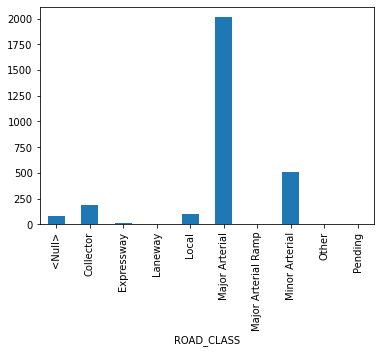

In [11]:
verybad.groupby('ROAD_CLASS')['ACCNUM'].nunique().plot(kind = 'bar')

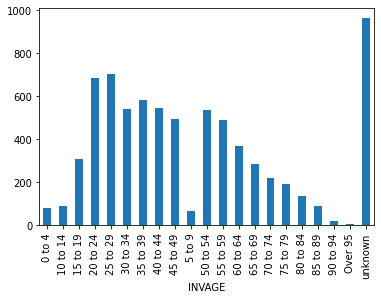

In [24]:
# Age of injured party
verybad.groupby('INVAGE')['ACCNUM'].nunique().plot(kind='bar')

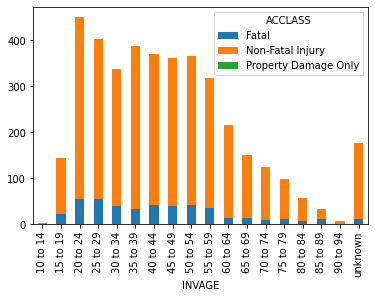

In [30]:
# Age of Injured or Killed Driver
verybad[(verybad['INVTYPE'] == 'Driver') & (verybad['INVAGE'] != 'Unknown')].groupby(['INVAGE', 'ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked=True)

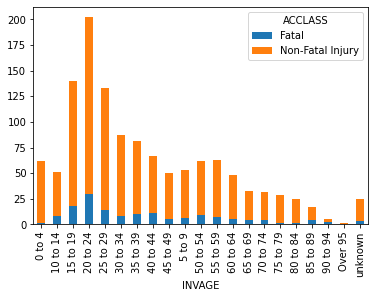

In [73]:
#Age of Injured or Killed Passenger
verybad[(verybad['INVTYPE'] == 'Passenger') & (verybad['INVAGE'] != 'Unknown')].groupby(['INVAGE', 'ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked=True)

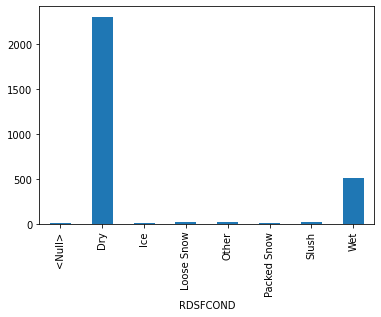

In [74]:
verybad.groupby('RDSFCOND')['ACCNUM'].nunique().plot(kind='bar')

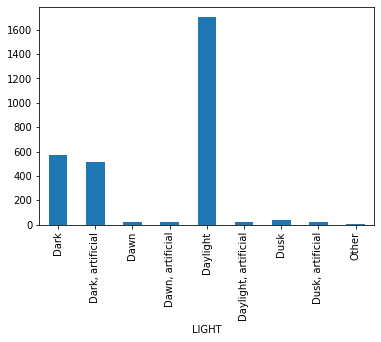

In [76]:
verybad.groupby('LIGHT')['ACCNUM'].nunique().plot(kind='bar')

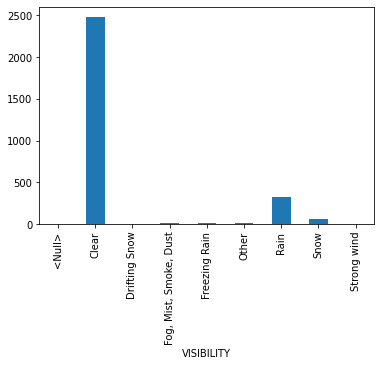

In [77]:
verybad.groupby('VISIBILITY')['ACCNUM'].nunique().plot(kind='bar')

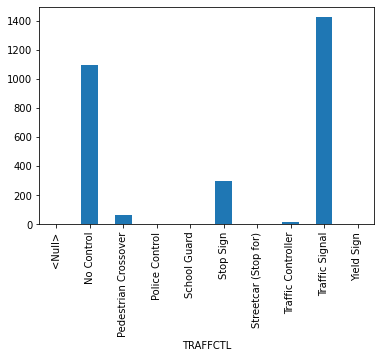

In [78]:
verybad.groupby('TRAFFCTL')['ACCNUM'].nunique().plot(kind='bar')